# 1. Import packages

In [1]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.8.0


# 2. Load RNA MERFISH 4000 genes

In [3]:
ref_folder = r'L:\Shiwei\DNA_MERFISH_analysis\MERFISH_MTG_STG\doi_10.5061_dryad.x3ffbg7mw__v16'
ref_fname = os.path.join(ref_folder, r'MTG_4000_MERFISH_raw.h5ad')

ref_raw_adata = sc.read_h5ad(ref_fname)

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
ref_raw_adata.obs

,global.x,global.y,adjusted.x,adjusted.y,fov.x,fov.y,cluster_L1,cluster_L2,cluster_L3,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
fov_101_feature_3,-391.238327,1636.831711,-217.354626,909.350950,1158.272226,256.798133,EXC,eL5.IT,eL5.IT.2,1202,3976,36.468813,46.428571,58.702213,79.200201
fov_101_feature_5,-427.239199,1664.406694,-237.355111,924.670386,827.988997,509.779631,EXC,eL5.IT,eL5.IT.6,804,1908,34.748428,46.698113,61.635220,84.067086
fov_101_feature_6,-372.273225,1735.691495,-206.818458,964.273053,1332.263995,1163.768631,EXC,eL5/6.NP,eL5/6.NP,840,2069,35.572740,47.124215,62.590623,83.566941
fov_102_feature_3,-421.510040,1509.856116,-234.172244,838.808954,880.550093,926.746809,EXC,eL5.IT,eL5.IT.2,1165,3136,34.375000,43.718112,55.707908,77.359694
fov_102_feature_5,-402.467789,1566.624148,-223.593216,870.346749,1055.249646,1447.554440,EXC,eL5.IT,eL5.IT.5,984,2552,38.322884,47.531348,60.462382,81.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240495259594138995563004271519025383450,-5464.524244,411.526341,-3035.846802,228.625745,1968.950000,583.000000,oENDO,oENDO,oENDO.6,334,950,54.000000,67.263158,85.894737,100.000000
55265280608044589891114722178780662498,-5804.160486,564.325082,-3224.533603,313.513934,680.000000,1993.450000,oENDO,oENDO,oENDO.5,124,284,71.126761,91.549296,100.000000,100.000000
307732216481176265751988896560759716047,-6104.222992,712.547138,-3391.234996,395.859521,1602.500000,1515.500000,oENDO,oENDO,oENDO.7,130,268,70.149254,88.805970,100.000000,100.000000
92931439707904599931293188460431397820,-6148.043823,665.422141,-3415.579902,369.678967,1198.000000,1080.500000,oENDO,oENDO,oENDO.7,199,417,57.314149,76.258993,100.000000,100.000000


In [5]:
np.unique(ref_raw_adata.obs['cluster_L2'].tolist())

array(['eL2/3.IT', 'eL4/5.IT', 'eL5.ET', 'eL5.IT', 'eL5/6.NP', 'eL6.CT',
       'eL6.IT', 'eL6.IT.CAR3', 'eL6b', 'iLAMP5', 'iPVALB', 'iSST',
       'iVIP', 'lASC', 'lMGC', 'lOGC', 'lOPC', 'oENDO', 'oMURAL'],
      dtype='<U11')

In [6]:
ref_raw_adata.X

array([[2, 0, 0, ..., 1, 1, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

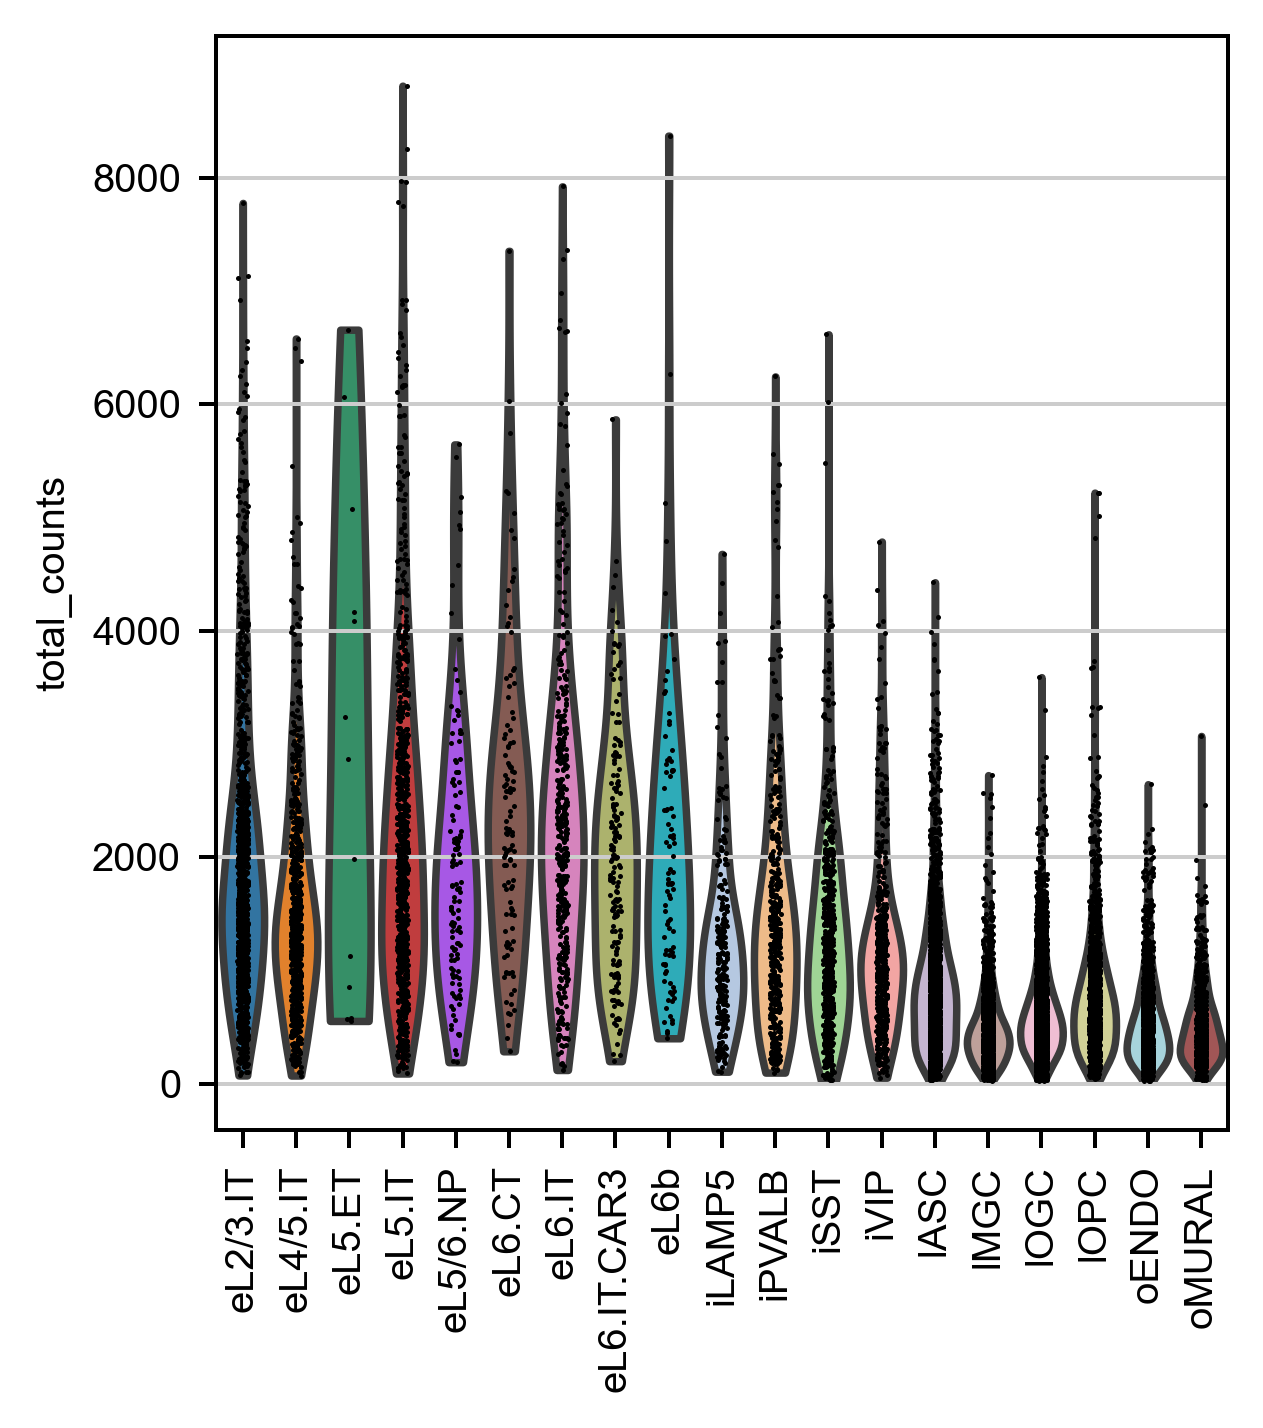

In [7]:
sc.pl.violin(ref_raw_adata, keys='total_counts', groupby='cluster_L2', rotation=90)

In [16]:
sorted_group_order = ['eL5.ET', 'eL6b','eL6.IT', 'eL6.IT.CAR3',  'eL6.CT','eL5.IT','eL5/6.NP','eL2/3.IT','eL4/5.IT',
                      'iPVALB','iLAMP5','iVIP','iSST','lOPC','lASC','lOGC', 'lMGC','oENDO',]


In [17]:
# get total counts
rna_total_df = pd.DataFrame(ref_raw_adata.obs.groupby(by='cluster_L2')['total_counts'].mean())
rna_total_df.rename(columns={'total_counts':'total_counts_mean'}, inplace=True)
rna_total_df['total_counts_median']= pd.DataFrame(ref_raw_adata.obs.groupby(by='cluster_L2')['total_counts'].median())
rna_total_df
#rna_total_df['atac_UM_median'] = pd.DataFrame(adata.obs.groupby(by='subclass_label_new')['UM'].median())

,total_counts_mean,total_counts_median
cluster_L2,,
eL2/3.IT,1949.031863,1651.0
eL4/5.IT,1573.146471,1382.0
eL5.ET,2909.000000,2868.0
eL5.IT,2203.912698,1923.5
eL5/6.NP,1987.640625,1751.5
eL6.CT,2470.721739,2252.0
eL6.IT,2383.840295,2206.0
eL6.IT.CAR3,1992.343195,1911.0
eL6b,2075.076923,1774.0


In [18]:
plot_df = pd.DataFrame(rna_total_df['total_counts_median']).transpose()
plot_df = plot_df[sorted_group_order]
plot_df

cluster_L2,eL5.ET,eL6b,eL6.IT,eL6.IT.CAR3,eL6.CT,eL5.IT,eL5/6.NP,eL2/3.IT,eL4/5.IT,iPVALB,iLAMP5,iVIP,iSST,lOPC,lASC,lOGC,lMGC,oENDO
total_counts_median,2868.0,1774.0,2206.0,1911.0,2252.0,1923.5,1751.5,1651.0,1382.0,1248.0,1077.0,1050.5,1158.0,644.0,756.0,535.0,427.0,453.5


In [31]:
sorted_group_order_name = [g[1:].replace('.','-') for g in sorted_group_order]
sorted_group_order_name 

['L5-ET',
 'L6b',
 'L6-IT',
 'L6-IT-CAR3',
 'L6-CT',
 'L5-IT',
 'L5/6-NP',
 'L2/3-IT',
 'L4/5-IT',
 'PVALB',
 'LAMP5',
 'VIP',
 'SST',
 'OPC',
 'ASC',
 'OGC',
 'MGC',
 'ENDO']

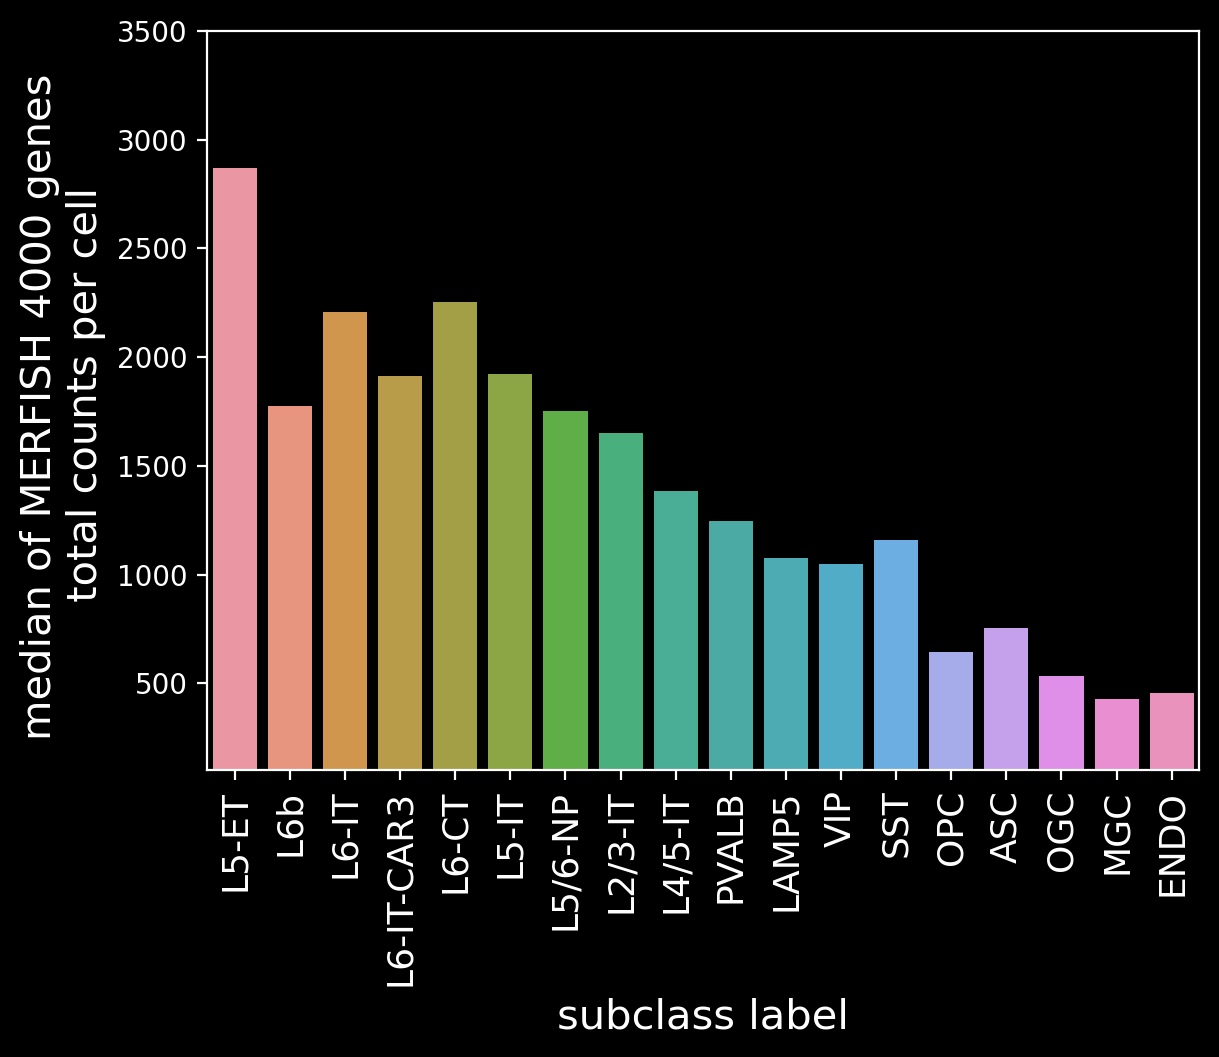

In [32]:

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['figure.dpi'] = 300

plt.style.use('default')
plt.style.use('dark_background')

sns.barplot(plot_df)
plt.ylim([100,3500])
plt.xticks(ticks =np.arange(0,len(sorted_group_order_name)),labels = sorted_group_order_name, rotation=90,fontsize=13)
plt.yticks(fontsize=10)

plt.xlabel('subclass label',fontsize=15)
plt.ylabel('median of MERFISH 4000 genes \n total counts per cell',fontsize=15)

plt.show()